In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as f
from torchvision import datasets, transforms
import torch.optim as optim
from torch.utils.data import DataLoader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/ar040701/CV-Project.git

fatal: destination path 'CV-Project' already exists and is not an empty directory.


In [ ]:
!cd CV-Project && git log --oneline --graph --decorate

* e45f83d (HEAD -> main, origin/main, origin/HEAD) Initial commit


In [ ]:
!pip install -U --no-cache-dir gdown --pre

In [ ]:
#https://drive.google.com/file/d/1AoZ1ipmQfW2nScBy4ITF15XERW28XWmQ/view?usp=drive_link
!gdown --id 1AoZ1ipmQfW2nScBy4ITF15XERW28XWmQ -O /content/dataset.zip


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1AoZ1ipmQfW2nScBy4ITF15XERW28XWmQ
From (redirected): https://drive.google.com/uc?id=1AoZ1ipmQfW2nScBy4ITF15XERW28XWmQ&confirm=t&uuid=9867cb6a-5a0d-42d4-9b30-525ffe3fd1e9
To: /content/dataset.zip
100% 994M/994M [00:11<00:00, 87.4MB/s]


In [ ]:
!unzip /content/dataset.zip -d /content/dataset/

Archive:  /content/dataset.zip
replace /content/dataset/VeRi/image_test/0061_c004_00083700_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls /content/dataset/

VeRi


In [ ]:
import os
path = "/content/dataset/VeRi/image_train/"
print(os.listdir(path))

['0176_c009_00051810_0.jpg', '0268_c006_00050825_0.jpg', '0024_c009_00059955_0.jpg', '0169_c010_00031020_1.jpg', '0034_c014_00015840_0.jpg', '0484_c011_00053185_2.jpg', '0491_c002_00059930_0.jpg', '0648_c003_00060525_0.jpg', '0256_c010_00041345_0.jpg', '0147_c006_00086525_0.jpg', '0044_c010_00023765_0.jpg', '0334_c013_00009885_0.jpg', '0243_c011_00036030_0.jpg', '0307_c012_00076440_0.jpg', '0603_c009_00023250_0.jpg', '0714_c019_00044370_0.jpg', '0680_c006_00079130_1.jpg', '0447_c016_00073460_0.jpg', '0194_c006_00050990_1.jpg', '0303_c001_00038950_0.jpg', '0509_c004_00011945_1.jpg', '0222_c013_00071530_0.jpg', '0572_c006_00053250_0.jpg', '0171_c002_00042325_0.jpg', '0376_c008_00037135_1.jpg', '0033_c016_00009920_0.jpg', '0440_c013_00032155_0.jpg', '0536_c018_00013000_0.jpg', '0594_c014_00085625_0.jpg', '0479_c017_00014725_1.jpg', '0094_c009_00033615_0.jpg', '0312_c011_00088360_0.jpg', '0370_c006_00063815_0.jpg', '0600_c007_00079555_0.jpg', '0701_c011_00071960_0.jpg', '0280_c002_00046310

In [ ]:
from PIL import Image
import os
from torch.utils.data import DataLoader, Dataset

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [83]:
class CustomDataset(Dataset):

  def __init__(self,root, transform):
    self.root = root
    self.image = [f for f in os.listdir(self.root) if f.endswith('.jpg')]
    self.transform = transform

  def __len__(self):
    return len(self.image)

  def __getitem__(self,index):
     img_path = os.path.join(self.root, self.image[index])
     image = Image.open(img_path).convert("RGB")
     if self.transform:
        image = self.transform(image)
     label=int(self.image[index].split('_')[0])
     return image, label

In [84]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [85]:
path = "/content/dataset/VeRi/image_train/"
train_dataset = CustomDataset(root=path, transform=transform)
print({len(train_dataset)})

path = "/content/dataset/VeRi/image_test/"
test_dataset = CustomDataset(root=path, transform=transform)
print({len(test_dataset)})

{37778}
{11579}


In [ ]:
# import os

# # Get the list of labels (you can get them from your dataset directly)
# labels = [label for _, label in train_dataset]

# # Get the number of unique labels
# unique_labels = set(labels)
# num_classes = len(unique_labels)

# # print(f"Number of unique labels: {num_classes}")
# # print(f"Unique labels: {unique_labels}")

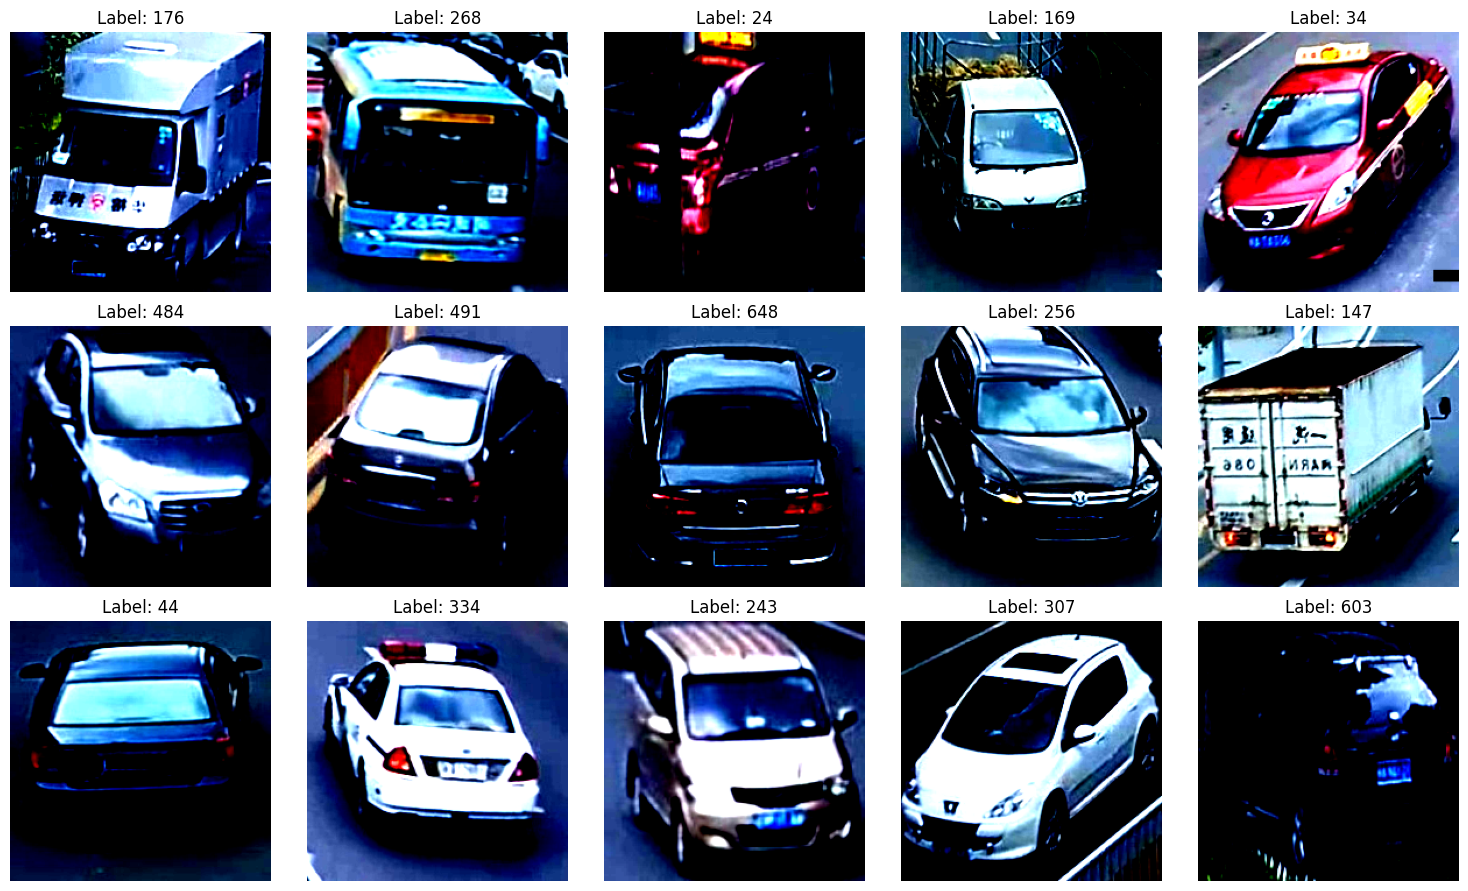

In [ ]:
import matplotlib.pyplot as plt

# Get the first 15 images
fig, axes = plt.subplots(3, 5, figsize=(15, 9))

for i in range(15):
    image, label = train_dataset[i]  # Fetch image and label
    image = image.permute(1, 2, 0).numpy()  # Convert tensor (C, H, W) → (H, W, C)

    ax = axes[i // 5, i % 5]
    ax.imshow(image)
    ax.axis("off")
    ax.set_title(f"Label: {label}")

plt.tight_layout()
plt.show()


In [86]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_dataLoader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

In [87]:
train_features, train_labels = next(iter(train_dataloader))
#(train_features.shape)
print(train_labels)

tensor([198,  33, 633, 287, 603, 374, 443,  25,  34, 266, 678,  28, 525, 713,
        190, 111, 564, 591,  77, 490,  60, 701, 359, 221, 206, 393, 592, 488,
        563, 390, 613, 171, 165, 681, 575, 394, 531, 608,  24,   3,  57, 674,
        769, 442, 303, 692, 599, 439, 409, 661, 277, 409, 442, 528, 650, 731,
        681, 673,  67, 235,  50, 463, 269, 512])


In [88]:
test_features, test_labels = next(iter(test_dataLoader))
print(test_features.shape)
print(test_labels.shape)

torch.Size([100, 3, 224, 224])
torch.Size([100])


In [89]:
import torchvision.models as models

resnet_model = models.resnet50(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
resnet_model


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [90]:
for param in resnet_model.parameters():
  param.requires_grad=False

In [91]:
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 770)
resnet_model= resnet_model.to(device)

In [93]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.fc.parameters(), lr=0.001, weight_decay=0.001)
epochs=10

In [94]:
for epoch in range(epochs):
  running_loss = 0.0
  print(f"Epoch {epoch}...")
  for features,labels in train_dataloader:
    features, labels = features.to(device), labels.to(device)

    outputs = resnet_model(features)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print(f" Loss: {running_loss/len(train_dataloader)}")

Epoch 0...
 Loss: 4.36483068272547
Epoch 1...
 Loss: 2.4940227903488728
Epoch 2...
 Loss: 1.9656167413579229
Epoch 3...
 Loss: 1.7244269769203844
Epoch 4...
 Loss: 1.6043884457670492
Epoch 5...
 Loss: 1.533164058340786
Epoch 6...
 Loss: 1.4917700256389612
Epoch 7...
 Loss: 1.457588778937932
Epoch 8...
 Loss: 1.4401727564847207
Epoch 9...
 Loss: 1.4253911465759406


In [ ]:
resnet_model.eval()
correct=0
total=0
with torch.no_grad():
  for features,labels in test_dataLoader:
    features , labels = features.to(device),labels.to(device)
    outputs = resnet_model(features)
    total+= labels.size(0)
    _, index = torch.max(outputs,1)
    correct += (index==labels).sum().item()
accuracy = 100*correct/total
print(f'accuracy is : {accuracy}%')

accuracy is : 0.0%
